In [66]:
# Who will accept the coupons? analysis and visualisation cade

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [67]:
data = pd.read_csv('coupons.csv')

In [68]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [70]:
# missing vals
miss_val = data.isnull().sum()
print("Missing values per column: \n", miss_val)
# Percentage 
miss_percent = (miss_val / len(data)) * 100
print("Percentage of missing values: \n", miss_percent)



Missing values per column: 
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Percentage of missing values: 
 destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time      

In [71]:
# dropping car data as 99% is missing
data = data.drop("car", axis=1)
data = data.dropna()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

% of Customers chose Yes =  56.93352098683666
% of Customers chose No =  43.06647901316334


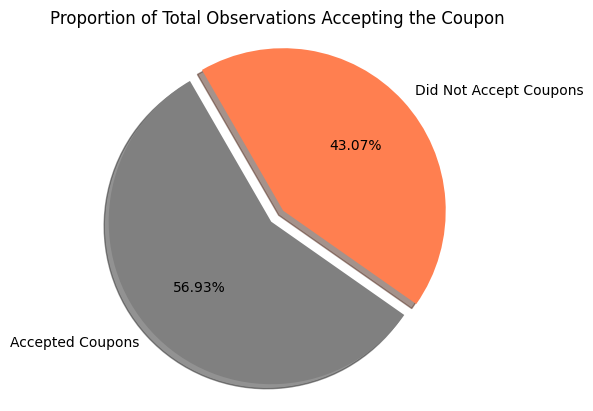

In [73]:
# Percentage of the ones chose to accept the coupon
yes=(data[data['Y'] == 1].shape[0] / data['Y'].shape[0]) * 100
no=(data[data['Y'] == 0].shape[0] / data['Y'].shape[0]) * 100
print ("% of Customers chose Yes = ",yes)
print ("% of Customers chose No = ",no)

# visualization
labels = ['Accepted Coupons', 'Did Not Accept Coupons']
sizes = [yes, no]
colors = ['gray', 'coral']

plt.pie(sizes, explode = (0.1, 0), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=120)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Total Observations Accepting the Coupon')
plt.show()



<Axes: title={'center': 'Coupon numbers'}, xlabel='coupon'>

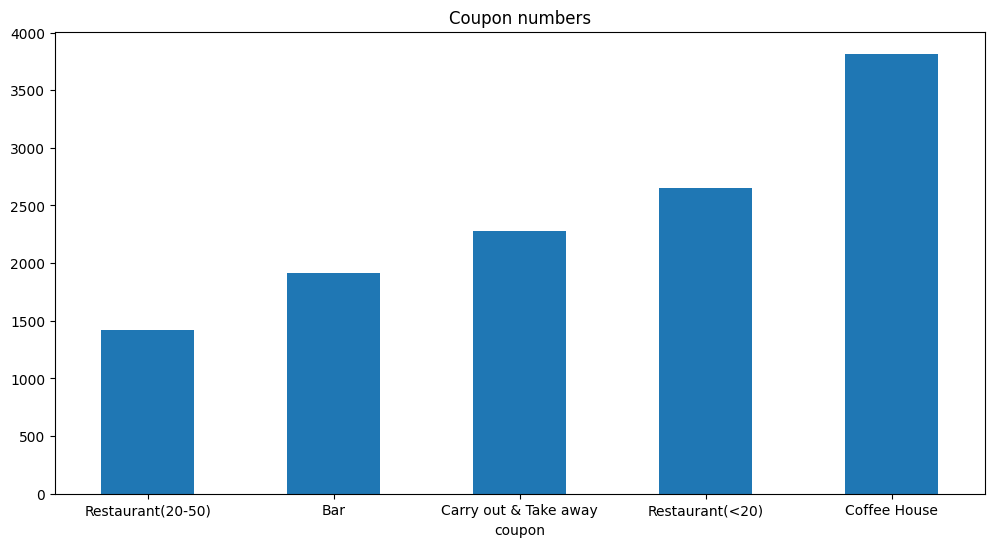

In [74]:
#Use a bar plot to visualize the coupon column.
Barplot= data.groupby("coupon").size().sort_values(ascending=True).plot.bar(title="Coupon numbers",  rot=0, figsize=(12, 6))
Barplot

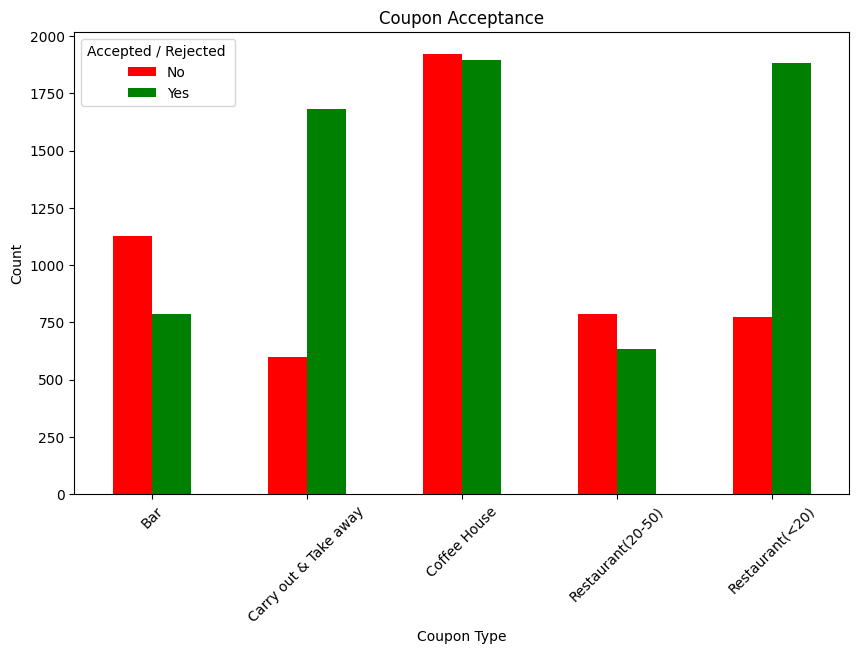

In [75]:
#type of coupon  acceptance ratio
data.groupby(["coupon", "Y"]).size()
group_data = data.groupby(["coupon", "Y"]).size().unstack()
group_data.plot(kind="bar", stacked=False, figsize=(10, 6), color=['red', 'green'])

# Adding labels and title
plt.title("Coupon Acceptance")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted / Rejected ", labels=["No", "Yes"])

# Show 
plt.show()

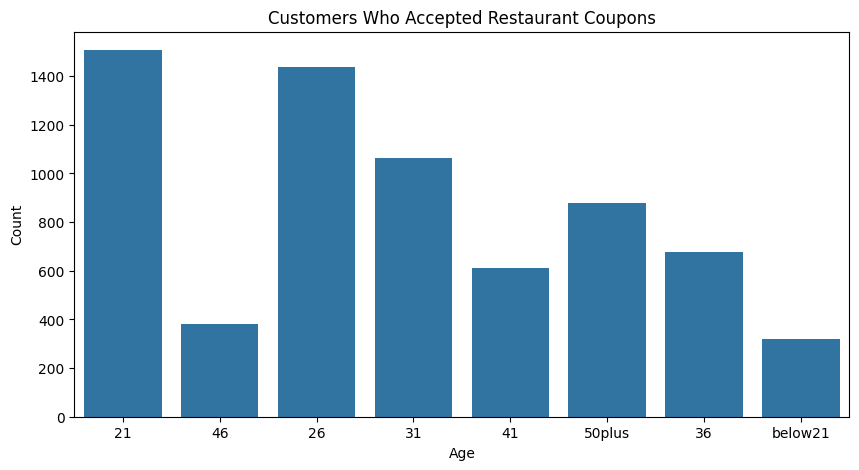

In [76]:
# Compare distributions using visualizations
plt.figure(figsize=(10, 5))
accepted_coupons = data[data['Y'] == 1]
sns.countplot(data=accepted_coupons, x='age')
plt.title('Customers Who Accepted Restaurant Coupons')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'Bar coupon acceptance ratio'}>

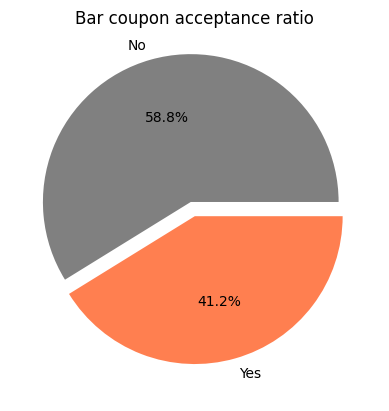

In [77]:
# Bar related coupon acceptance ratio
barAnalyse = data[data["coupon"]=="Bar"]
(barAnalyse.groupby("Y").size()/barAnalyse["Y"].count()).\
    plot.pie(
        autopct="%1.1f%%", 
        labels=["No","Yes"], 
        title="Bar coupon acceptance ratio",explode = (0.1, 0), colors = ['gray', 'coral']
    )


<Axes: title={'center': 'Drivers who went to bar 1 to 3 times a month'}, ylabel='0'>

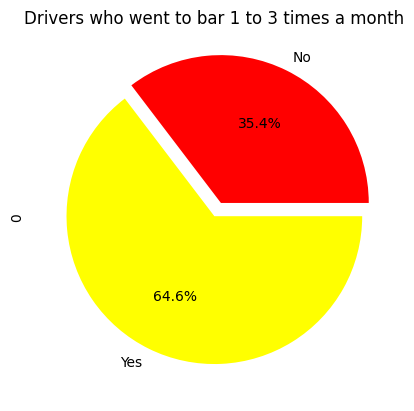

In [78]:
# Bar related coupon acceptance by drivers visited more than once
(barAnalyse.groupby(["Bar", "Y"]).size()/barAnalyse.groupby("Bar").size()).reset_index().query("Bar == '1~3'")[0].plot.pie(autopct="%1.1f%%", 
                                    labels=["No","Yes"], title="Drivers who went to bar 1 to 3 times a month",
                                                            explode = (0.1, 0), colors = ['red', 'yellow'])



array([<Axes: ylabel='0'>], dtype=object)

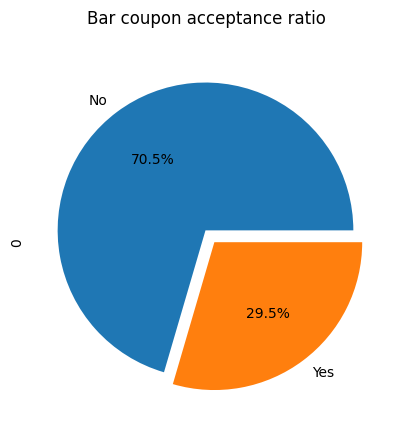

In [79]:

LessorNever = ["less1","never"]
df_ = (barAnalyse.query("Bar in @LessorNever").groupby("Y").size().reset_index()[0]/barAnalyse["Y"].count())
df_.plot.pie(autopct="%1.1f%%", labels=["No","Yes"], subplots=True, title="Bar coupon acceptance ratio", explode = (0.1, 0))

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


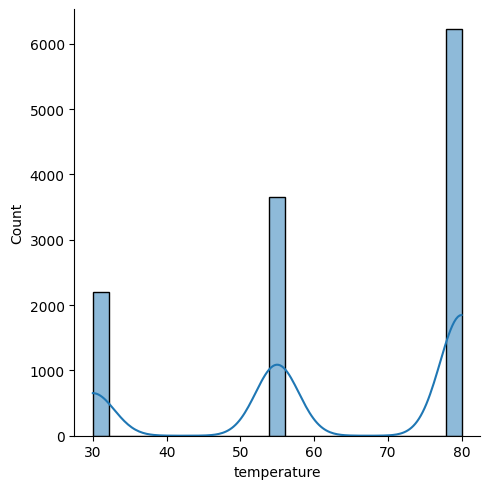

In [81]:
#Temperature 
TempHist = sns.displot(data=data, x="temperature",  kde=True)
tempCoupons = data[data["coupon"]=="Bar"]
tempCoupons.head()

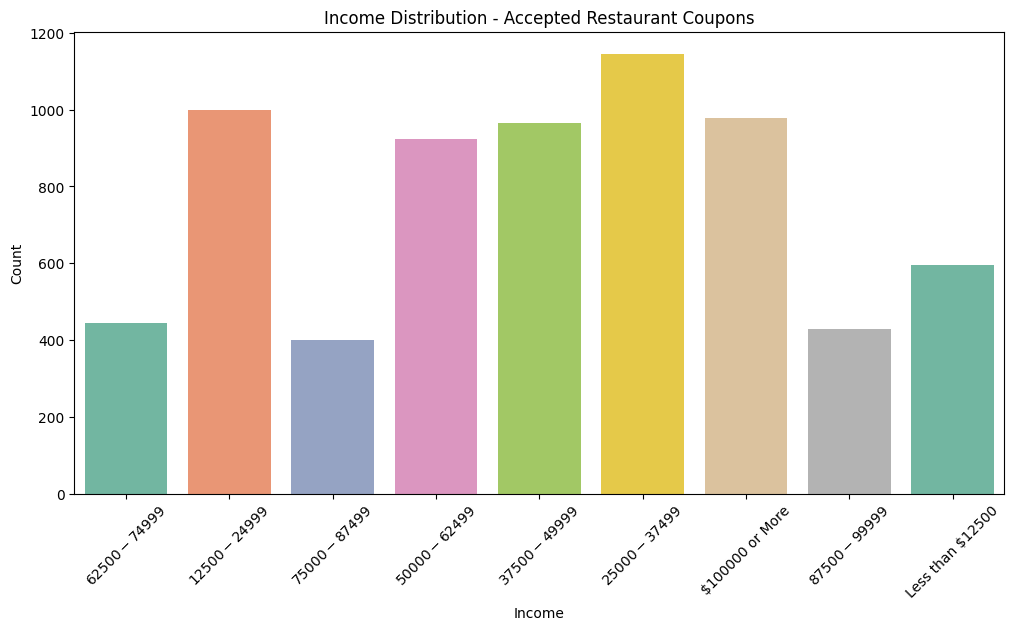

In [82]:
plt.figure(figsize=(12, 6))
yes = data[data['Y'] == 1]
sns.countplot(data=yes, x='income', palette='Set2', hue='income')
plt.title('Income Distribution - Accepted Restaurant Coupons')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()